In [1]:
import pandas as pd
# import os 


seriesPobl = pd.DataFrame()

seriesPobl = pd.read_csv(f"recursos/seriespoblacionales.csv",sep=";")

seriesPobl

,Edad (grupos quinquenales),Españoles/Extranjeros,Sexo,Año,Total
0,95-99 años,Extranjeros,Hombres,2022,380
1,95-99 años,Españoles,Hombres,2022,28.816
2,90-94 años,Extranjeros,Hombres,2022,2.213
3,90-94 años,Españoles,Hombres,2022,141.109
4,85-89 años,Extranjeros,Hombres,2022,7.537
...,...,...,...,...,...
2095,10-14 años,Españoles,Mujeres,1998,1.099.059
2096,100 años y mñs,Extranjeros,Mujeres,1998,46
2097,100 años y mñs,Españoles,Mujeres,1998,2.645
2098,0-4 años,Extranjeros,Mujeres,1998,10.789


In [2]:
seriesPobl.dtypes

Edad (grupos quinquenales)    object
Españoles/Extranjeros         object
Sexo                          object
Año                            int64
Total                         object
dtype: object

In [3]:
seriesPobl.loc[seriesPobl.duplicated()]

,Edad (grupos quinquenales),Españoles/Extranjeros,Sexo,Año,Total


In [4]:
seriesPobl=seriesPobl.loc[seriesPobl["Sexo"] != "Sexo"]

In [5]:
seriesPobl.loc[seriesPobl.duplicated()]

,Edad (grupos quinquenales),Españoles/Extranjeros,Sexo,Año,Total


In [6]:
seriesPobl.loc[seriesPobl["Sexo"]=="Sexo"]

,Edad (grupos quinquenales),Españoles/Extranjeros,Sexo,Año,Total


In [7]:
seriesPobl.iloc[13] # Hay un error producido por  los . en los numeros


Edad (grupos quinquenales)    65-69 años
Españoles/Extranjeros          Españoles
Sexo                             Hombres
Año                                 2022
Total                          1.138.110
Name: 13, dtype: object

In [8]:
seriesPobl=seriesPobl.replace(regex="[.]",value="")  # Reemplazamos los puntos

In [9]:

seriesPobl["Total"] = pd.to_numeric(seriesPobl["Total"])
seriesPobl.dtypes

Edad (grupos quinquenales)    object
Españoles/Extranjeros         object
Sexo                          object
Año                            int64
Total                          int64
dtype: object

In [10]:
seriesPobl2022=seriesPobl.loc[seriesPobl["Año"]==2022]
seriesPobl2022


,Edad (grupos quinquenales),Españoles/Extranjeros,Sexo,Año,Total
0,95-99 años,Extranjeros,Hombres,2022,380
1,95-99 años,Españoles,Hombres,2022,28816
2,90-94 años,Extranjeros,Hombres,2022,2213
3,90-94 años,Españoles,Hombres,2022,141109
4,85-89 años,Extranjeros,Hombres,2022,7537
...,...,...,...,...,...
79,10-14 años,Españoles,Mujeres,2022,1101534
80,100 años y mñs,Extranjeros,Mujeres,2022,129
81,100 años y mñs,Españoles,Mujeres,2022,15128
82,0-4 años,Extranjeros,Mujeres,2022,125499


In [11]:
seriesPobl2022=seriesPobl2022.drop(columns=["Año"])

seriesPobl2022


,Edad (grupos quinquenales),Españoles/Extranjeros,Sexo,Total
0,95-99 años,Extranjeros,Hombres,380
1,95-99 años,Españoles,Hombres,28816
2,90-94 años,Extranjeros,Hombres,2213
3,90-94 años,Españoles,Hombres,141109
4,85-89 años,Extranjeros,Hombres,7537
...,...,...,...,...
79,10-14 años,Españoles,Mujeres,1101534
80,100 años y mñs,Extranjeros,Mujeres,129
81,100 años y mñs,Españoles,Mujeres,15128
82,0-4 años,Extranjeros,Mujeres,125499


In [12]:
seriesPobl2022Hombres=seriesPobl2022.loc[seriesPobl["Sexo"]=="Hombres"]    # Hacemos un dataframe para los hombres y otro para las mujeres 
seriesPobl2022Mujeres=seriesPobl2022.loc[seriesPobl["Sexo"]=="Mujeres"]

In [13]:
seriesPobl2022HombresPorGrupo=seriesPobl2022Hombres.groupby("Edad (grupos quinquenales)")
seriesPobl2022MujeresPorGrupo=seriesPobl2022Mujeres.groupby("Edad (grupos quinquenales)")

In [14]:
seriesPobl2022HombresPorGrupo=seriesPobl2022HombresPorGrupo.aggregate('sum')
seriesPobl2022MujeresPorGrupo=seriesPobl2022MujeresPorGrupo.aggregate('sum')



C:\Users\Adolf\AppData\Local\Temp\ipykernel_3428\2432823815.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seriesPobl2022HombresPorGrupo=seriesPobl2022HombresPorGrupo.aggregate('sum')
C:\Users\Adolf\AppData\Local\Temp\ipykernel_3428\2432823815.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seriesPobl2022MujeresPorGrupo=seriesPobl2022MujeresPorGrupo.aggregate('sum')


In [15]:
seriesPobl2022HombresPorGrupo  

,Total
Edad (grupos quinquenales),
0-4 años,929686
10-14 años,1296012
100 años y mñs,4382
15-19 años,1273951
20-24 años,1242864
25-29 años,1283120
30-34 años,1384020
35-39 años,1563840
40-44 años,1923796


In [16]:
# Hay que reordenar las filas 
seriesPobl2022HombresPorGrupo=seriesPobl2022HombresPorGrupo.reindex(["0-4 años",	
"5-9 años",
"10-14 años",
"15-19 años",
"20-24 años",
"25-29 años",
"30-34 años",
"35-39 años",
"40-44 años",	
"45-49 años",	
"50-54 años",
"55-59 años",
"60-64 años",
"65-69 años",
"70-74 años",
"75-79 años",
"80-84 años",
"85-89 años",
"90-94 años",
"95-99 años",
"100 años y mñs"])

seriesPobl2022MujeresPorGrupo=seriesPobl2022MujeresPorGrupo.reindex(["0-4 años",	
"5-9 años",
"10-14 años",
"15-19 años",
"20-24 años",
"25-29 años",
"30-34 años",
"35-39 años",
"40-44 años",	
"45-49 años",	
"50-54 años",
"55-59 años",
"60-64 años",
"65-69 años",
"70-74 años",
"75-79 años",
"80-84 años",
"85-89 años",
"90-94 años",
"95-99 años",
"100 años y mñs"])


In [17]:
seriesPobl2022MujeresPorGrupo

,Total
Edad (grupos quinquenales),
0-4 años,880082
5-9 años,1086536
10-14 años,1221361
15-19 años,1197648
20-24 años,1173169
25-29 años,1242519
30-34 años,1367915
35-39 años,1568488
40-44 años,1892599


<AxesSubplot: xlabel='Edad (grupos quinquenales)'>

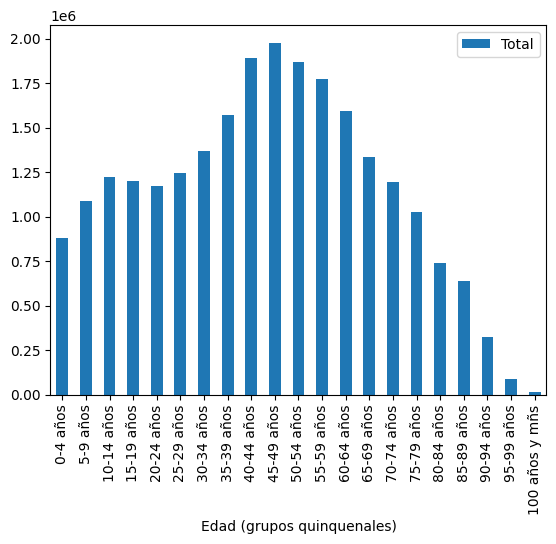

In [18]:
seriesPobl2022MujeresPorGrupo.plot(kind="bar")

In [19]:
MujeresCantidad=list(seriesPobl2022MujeresPorGrupo["Total"])
HombresCantidad=list(seriesPobl2022HombresPorGrupo["Total"])

rangosEdad=["0-4 años",	
"5-9 años",
"10-14 años",
"15-19 años",
"20-24 años",
"25-29 años",
"30-34 años",
"35-39 años",
"40-44 años",	
"45-49 años",	
"50-54 años",
"55-59 años",
"60-64 años",
"65-69 años",
"70-74 años",
"75-79 años",
"80-84 años",
"85-89 años",
"90-94 años",
"95-99 años",
"100 años y mñs"]
rangosEdadNum=[i for i in range(0,21)]




In [20]:
EdadPersona=40         
SexoPersona="M"

# Para identificar el rango de edad al que pertenece la persona 
if EdadPersona<5:
    RangoPersona=1
elif EdadPersona<10:
    RangoPersona=2
elif EdadPersona<15:
    RangoPersona=3
elif EdadPersona<20:
    RangoPersona=4
elif EdadPersona<25:
    RangoPersona=5
elif EdadPersona<30:
    RangoPersona=6
elif EdadPersona<35:
    RangoPersona=7
elif EdadPersona<40:
    RangoPersona=8
elif EdadPersona<45:
    RangoPersona=9
elif EdadPersona<50:
    RangoPersona=10
elif EdadPersona<55:
    RangoPersona=11
elif EdadPersona<60:
    RangoPersona=12
elif EdadPersona<65:
    RangoPersona=13
elif EdadPersona<70:
    RangoPersona=14
elif EdadPersona<75:
    RangoPersona=15
elif EdadPersona<80:
    RangoPersona=16
elif EdadPersona<85:
    RangoPersona=17
elif EdadPersona<90:
    RangoPersona=18
elif EdadPersona<95:
    RangoPersona=19
elif EdadPersona<100:
    RangoPersona=20
elif EdadPersona>=100:
    RangoPersona=21

listaColoresH=["b" for i in range(0,21)]  # LLeno una lista de 21 "b"
listaColoresM=["m" for i in range(0,21)]  # LLeno una lista de 21 "b"

listaColoresH[RangoPersona-1]="y"   # Asigno en la posicion que toque  el color amarillo  
listaColoresM[RangoPersona-1]="y"   # Asigno en la posicion que toque  el color amarillo  
listaColoresH

['b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'y',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b']

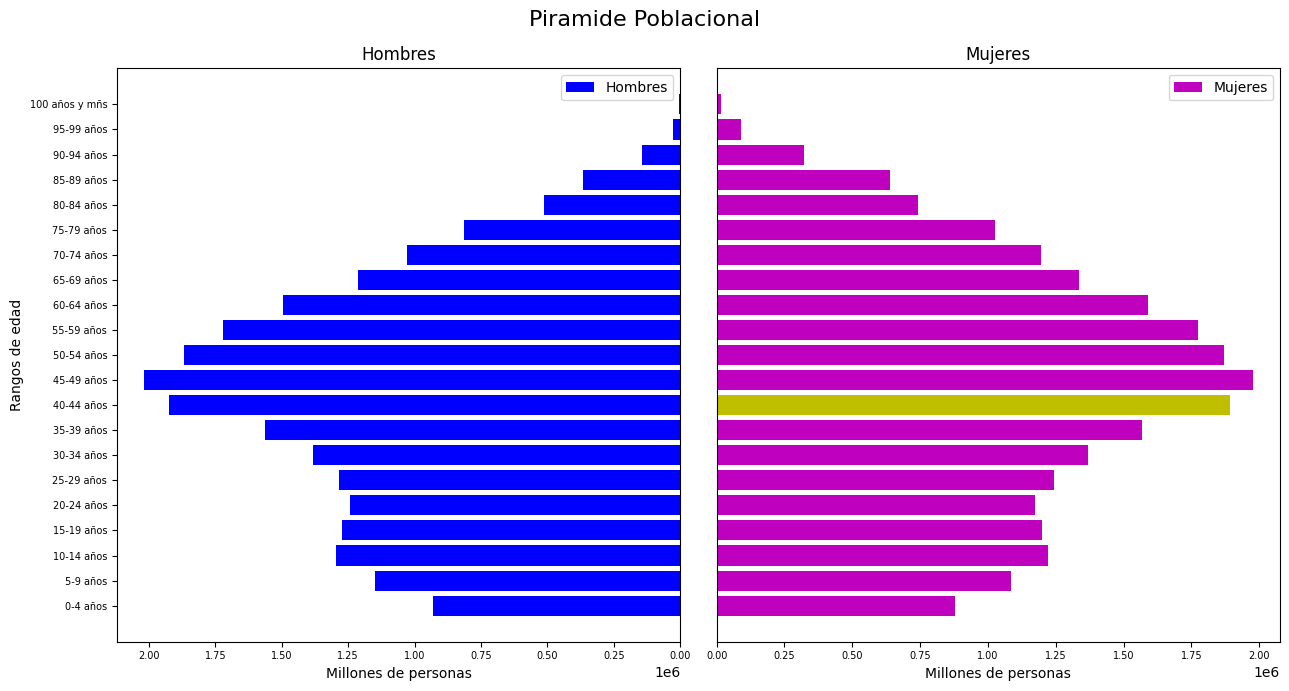

In [23]:

from matplotlib import pyplot as plt
fig, axs = plt.subplots(1,2,figsize=(13,7)) 
    # # Configuro  sistema d'eixos 
fig.suptitle('Piramide poblacional', fontsize=16)     


# Printar la barra de edad que pertoque de la persona en amarillo
if SexoPersona=="H":
    axs[0].barh(rangosEdad,HombresCantidad, color=listaColoresH, label='Hombres')
    axs[1].barh(rangosEdad,MujeresCantidad, color="m", label='Mujeres')

if SexoPersona=="M":
    axs[0].barh(rangosEdad,HombresCantidad, color="b", label='Hombres')
    axs[1].barh(rangosEdad,MujeresCantidad, color=listaColoresM, label='Mujeres')

# Resto parametros Grafico Hombre
axs[0].legend()
axs[0].set_title("Hombres")
axs[0].tick_params(axis='both', which='major', labelsize=7)
axs[0].set_ylabel ("Rangos de edad")
axs[0].set_xlabel ("Millones de personas")
axs[0].invert_xaxis()                          # Giro el grafico 
axs[0].set_yticks(rangosEdadNum,rangosEdad)    
    
# Resto parametros Grafico Mujer 
axs[1].legend()
axs[1].set_title("Mujeres")
axs[1].set_xlabel ("Millones de personas")
axs[1].tick_params(axis='both', which='major', labelsize=7)
axs[1].set_yticks([])    # Vacio los strings del eje Y 


# # Configuro com es mostren el subplot i  mostro la figura
plt.tight_layout()

#Guardem el grafic 
plt.savefig(fname="static/grafico",
            # bbox_inches ="tight",
            # pad_inches = 1,
            # transparent = True,
            # facecolor ="g",
            # edgecolor ='w',
            # orientation ='landscape'
            )
  
plt.show()          # Mostro i deixo visible la FIGURA 